<a href="https://colab.research.google.com/github/ROARMarketingConcepts/SugarCRM/blob/master/SugarCRM_ICP_Logistic_Regression_Using_sklearn_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SugarCRM ICP Analysis Using Logistic Regression

### Version 2

### Regression uses the Limited-Memory Broyden-Fletcher-Goldfarb-Shanno (LBFGS) optimization algorithm for parameter estimation. 

Performed by:

Ken Wood

Marketing Data Scientist

SugarCRM

kwood@sugarcrm.com

(919) 802-0065



### Mount the Google Drive where the data files are located.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load the necessary Python software packages to perform the logistic regression...

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load the 'opp_data' file from location *''/content/drive/My Drive/Colab Notebooks/SugarCRM ICP Analysis/'* and develop some summary statistics.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SugarCRM ICP Analysis/opportunity_data.csv')
df["Gross ARR"] = df["Gross ARR"].astype(float)
df["Creation to Qualification (Days)"] = pd.to_numeric(df["Creation to Qualification (Days)"], errors='coerce',downcast='unsigned')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 10 columns):
Creation to Qualification (Days)    1294 non-null uint16
Time Since Creation (Days)          1294 non-null int64
Lead Source                         1294 non-null object
Lead Source Detail Code             1294 non-null object
# of Employees Group 2              1294 non-null object
Revenue Line Item                   1294 non-null object
Customer Job Title Code             1294 non-null object
Region Code                         1294 non-null object
Gross ARR                           1294 non-null float64
Converted?                          1294 non-null int64
dtypes: float64(1), int64(2), object(6), uint16(1)
memory usage: 93.6+ KB


## Input (independent) variables

1. **Creation to Qualification (Days)** - time duration between opportunity creation and qualification by Sales
5. **Time Since Creation (Days)** 
6. **Lead Source**  - marketing lead source ('Online Advertising', 'Resource Library', 'Email', 'Event',
      'Content Syndication', 'List Purchase', 'Webinar', 'Social', 'Telemarketing')
6. **Lead Source**  
7. **Lead Source Detail Code**
9.  **# of Employees Group 2** (categorical: “0-100”, “100-1000”, "1000+")
23. **Revenue Line Item** (SugarCRM product)
24. **Customer Job Title Code**
25. **Region Code**
26. **Partner Assigned To**
26. **Gross ARR** (Gross Annual Recurring Revenue)

## Dependent variable (desired target):

13. **Converted?** (binary variable: 1 = "Yes", 0 = "No")



In [4]:
df.head()

,Creation to Qualification (Days),Time Since Creation (Days),Lead Source,Lead Source Detail Code,# of Employees Group 2,Revenue Line Item,Customer Job Title Code,Region Code,Gross ARR,Converted?
0,0,48,Email,Contact Us,0-100,Sugar Enterprise,Commercial Operations,NAM,7800.0,0
1,1,38,Online Advertising,Demo,0-100,Sugar Enterprise,C-Suite,NAM,3900.0,0
2,28,48,Online Advertising,Free Trial,1000+,Sugar Enterprise,VP/Director,NAM,15600.0,0
3,23,217,Resource Library,Free Trial,0-100,Sugar Professional,VP/Director,NAM,4800.0,0
4,0,85,Resource Library,Demo,0-100,Sugar Enterprise,Marketing,EMEA,7800.0,0


### Let's now do some data exploration!

In [5]:
print("Shape of dataframe: ",df.shape,"\n")             # Get shape of dataframe.
print(df.head())                                        # Print first 5 rows of dataframe.
print(df.describe())                                    # Get some summary stats on the numeric variables

Shape of dataframe:  (1294, 10) 

   Creation to Qualification (Days)  ...  Converted?
0                                 0  ...           0
1                                 1  ...           0
2                                28  ...           0
3                                23  ...           0
4                                 0  ...           0

[5 rows x 10 columns]
       Creation to Qualification (Days)  ...   Converted?
count                       1294.000000  ...  1294.000000
mean                          16.699382  ...     0.367852
std                           60.378197  ...     0.482407
min                            0.000000  ...     0.000000
25%                            0.000000  ...     0.000000
50%                            0.000000  ...     0.000000
75%                            8.000000  ...     1.000000
max                         1156.000000  ...     1.000000

[8 rows x 4 columns]


In [6]:
zeros,ones = df['Converted?'].value_counts()
print('numzeros: ',zeros,'numones: ',ones)
print('Percentage of opportunities that converted:', round((ones*100)/(zeros+ones),1),'%')
print('Percentage of opportunities that did not convert:', round((zeros*100)/(zeros+ones),1),'%')

numzeros:  818 numones:  476
Percentage of opportunities that converted: 36.8 %
Percentage of opportunities that did not convert: 63.2 %


### Plot the number of ones and zeros.

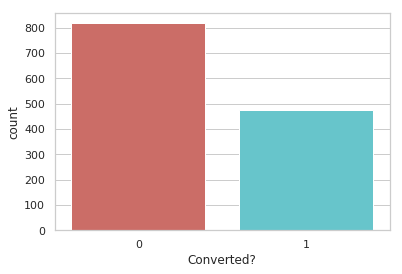

In [7]:
sns.countplot(x=df['Converted?'],palette='hls')

In [8]:
means = df.groupby('Converted?').mean()
means

,Creation to Qualification (Days),Time Since Creation (Days),Gross ARR
Converted?,,,
0,20.338631,131.184597,26832.331015
1,10.445378,117.808824,17988.537311


### Plot the mean Gross ARR for won and lost opportunities.

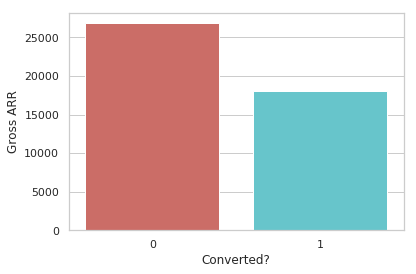

In [9]:
sns.barplot(x=means.index,y=means['Gross ARR'], palette='hls')

### *Conclusion: mean Gross ARR is a good predictor of conversion.*




### Let's plot the mean duration between Opportunity Creation  & Opportunity Qualification (Days)

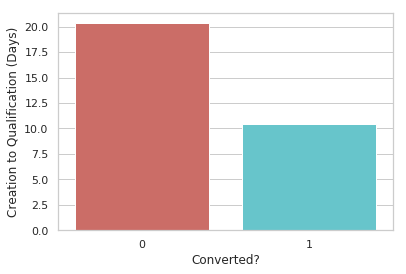

In [10]:
sns.barplot(x=means.index,y=means['Creation to Qualification (Days)'], palette='hls')

### *Conclusion: The duration between Opportunity Creation and Opportunity Qualification appears to be a good predictor of conversion.*

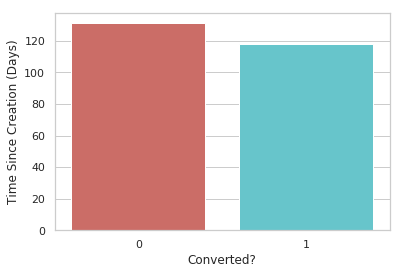

In [11]:
sns.barplot(x=means.index,y=means['Time Since Creation (Days)'], palette='hls')

### *Conclusion: The Time Since Creation (Days) metric does not appear to be a good predictor of conversion.*

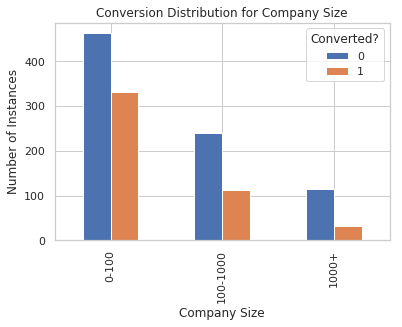

In [12]:
pd.crosstab(df['# of Employees Group 2'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution for Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_month_bar')

### *Conclusion:  'Company Size' does appear to be a good predictor of conversion.*

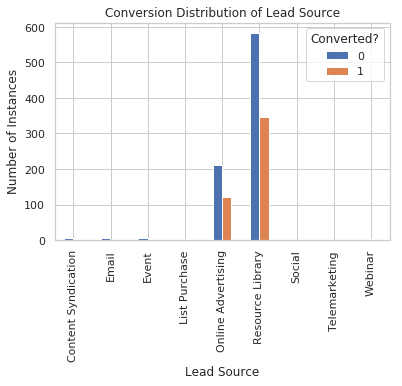

In [13]:
pd.crosstab(df['Lead Source'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### *Conclusion:  'Lead Source' does not appear to be a good predictor of conversion.*

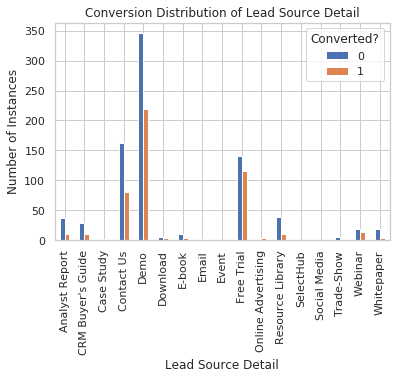

In [14]:
pd.crosstab(df['Lead Source Detail Code'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Lead Source Detail')
plt.xlabel('Lead Source Detail')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### *Conclusion:  'Lead Source Detail' does not appear to be a good predictor of conversion.*

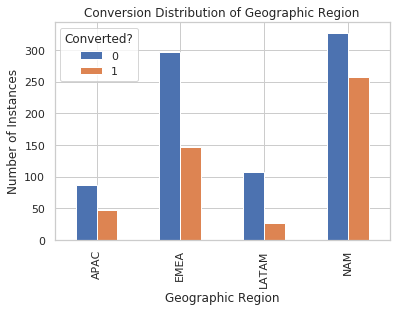

In [15]:
pd.crosstab(df['Region Code'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### *Conclusion:  Geographic region does appear to be a good predictor of conversion.*

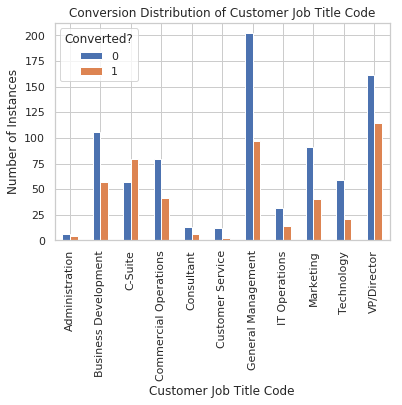

In [16]:
pd.crosstab(df['Customer Job Title Code'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Customer Job Title Code')
plt.xlabel('Customer Job Title Code')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### *Conclusion:  Customer Job Title does appear to be a fair predictor of conversion.*

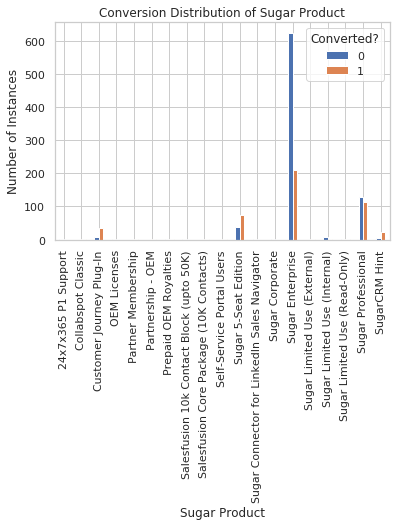

In [17]:
pd.crosstab(df['Revenue Line Item'],df['Converted?']).plot(kind='bar')
plt.title('Conversion Distribution of Sugar Product')
plt.xlabel('Sugar Product')
plt.ylabel('Number of Instances')
plt.savefig('pur_fre_pout_bar')

### *Conclusion:  Sugar Product selection does not appear to be a good predictor of conversion.*

### Now, we need to create dummy variables for: 


1.   'Lead Source'
2.   'Lead Source Detail Code'
3.  '# of Employees Group 2'
4.  'Revenue Line Item'
5.  'Customer Job Title Code'
6.  'Region Code'

In [18]:
df_vars=df.columns.values.tolist()
df_vars

['Creation to Qualification (Days)',
 'Time Since Creation (Days)',
 'Lead Source',
 'Lead Source Detail Code',
 '# of Employees Group 2',
 'Revenue Line Item',
 'Customer Job Title Code',
 'Region Code',
 'Gross ARR',
 'Converted?']

In [0]:
cat_vars=['Lead Source','Lead Source Detail Code','# of Employees Group 2','Revenue Line Item','Customer Job Title Code','Region Code']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    df

In [0]:
df_vars=df.columns.values.tolist()
cat_vars=['Lead Source','Lead Source Detail Code','# of Employees Group 2','Revenue Line Item','Customer Job Title Code','Region Code']
to_keep=[i for i in df_vars if i not in cat_vars]

The final list of variables will be:

In [21]:
df_final=df[to_keep]
df_final.columns.values

array(['Creation to Qualification (Days)', 'Time Since Creation (Days)',
       'Gross ARR', 'Converted?', 'Lead Source_Content Syndication',
       'Lead Source_Email', 'Lead Source_Event',
       'Lead Source_List Purchase', 'Lead Source_Online Advertising',
       'Lead Source_Resource Library', 'Lead Source_Social',
       'Lead Source_Telemarketing', 'Lead Source_Webinar',
       'Lead Source Detail Code_Analyst Report',
       "Lead Source Detail Code_CRM Buyer's Guide",
       'Lead Source Detail Code_Case Study',
       'Lead Source Detail Code_Contact Us',
       'Lead Source Detail Code_Demo', 'Lead Source Detail Code_Download',
       'Lead Source Detail Code_E-book', 'Lead Source Detail Code_Email',
       'Lead Source Detail Code_Event',
       'Lead Source Detail Code_Free Trial',
       'Lead Source Detail Code_Online Advertising',
       'Lead Source Detail Code_Resource Library',
       'Lead Source Detail Code_SelectHub',
       'Lead Source Detail Code_Social Media',

In [22]:
df_final.head()

,Creation to Qualification (Days),Time Since Creation (Days),Gross ARR,Converted?,Lead Source_Content Syndication,Lead Source_Email,Lead Source_Event,Lead Source_List Purchase,Lead Source_Online Advertising,Lead Source_Resource Library,Lead Source_Social,Lead Source_Telemarketing,Lead Source_Webinar,Lead Source Detail Code_Analyst Report,Lead Source Detail Code_CRM Buyer's Guide,Lead Source Detail Code_Case Study,Lead Source Detail Code_Contact Us,Lead Source Detail Code_Demo,Lead Source Detail Code_Download,Lead Source Detail Code_E-book,Lead Source Detail Code_Email,Lead Source Detail Code_Event,Lead Source Detail Code_Free Trial,Lead Source Detail Code_Online Advertising,Lead Source Detail Code_Resource Library,Lead Source Detail Code_SelectHub,Lead Source Detail Code_Social Media,Lead Source Detail Code_Trade-Show,Lead Source Detail Code_Webinar,Lead Source Detail Code_Whitepaper,# of Employees Group 2_0-100,# of Employees Group 2_100-1000,# of Employees Group 2_1000+,Revenue Line Item_24x7x365 P1 Support,Revenue Line Item_Collabspot Classic,Revenue Line Item_Customer Journey Plug-In,Revenue Line Item_OEM Licenses,Revenue Line Item_Partner Membership,Revenue Line Item_Partnership - OEM,Revenue Line Item_Prepaid OEM Royalties,Revenue Line Item_Salesfusion 10k Contact Block (upto 50K),Revenue Line Item_Salesfusion Core Package (10K Contacts),Revenue Line Item_Self-Service Portal Users,Revenue Line Item_Sugar 5-Seat Edition,Revenue Line Item_Sugar Connector for LinkedIn Sales Navigator,Revenue Line Item_Sugar Corporate,Revenue Line Item_Sugar Enterprise,Revenue Line Item_Sugar Limited Use (External),Revenue Line Item_Sugar Limited Use (Internal),Revenue Line Item_Sugar Limited Use (Read-Only),Revenue Line Item_Sugar Professional,Revenue Line Item_SugarCRM Hint,Customer Job Title Code_Administration,Customer Job Title Code_Business Development,Customer Job Title Code_C-Suite,Customer Job Title Code_Commercial Operations,Customer Job Title Code_Consultant,Customer Job Title Code_Customer Service,Customer Job Title Code_General Management,Customer Job Title Code_IT Operations,Customer Job Title Code_Marketing,Customer Job Title Code_Technology,Customer Job Title Code_VP/Director,Region Code_APAC,Region Code_EMEA,Region Code_LATAM,Region Code_NAM
0,0,48,7800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,38,3900.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,28,48,15600.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,23,217,4800.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,85,7800.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### Separate the 'X' matrix and 'y' output vector.

In [0]:
X = df_final.loc[:, df_final.columns != 'Converted?']
X = pd.DataFrame(X)
y = df_final.loc[:, df_final.columns == 'Converted?']
y = pd.DataFrame(y)

### Verify the shapes of the 'X' matrix and 'y' output vector...

In [24]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (1294, 66)
Shape of y:  (1294, 1)


### Feature Selection

Feature selection is a process where we automatically select those features in our data that contribute most to the prediction variable or output in which we are interested.

Having too many irrelevant features in our data can decrease the accuracy of the models. There are three benefits of performing feature selection before modeling our data:

*  **Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.
*  **Improves Accuracy:** Less misleading data means modeling accuracy improves.
*  **Reduces Training Time:** Less data means that algorithms train faster.


Two different feature selection methods provided by the scikit-learn Python library are **Recursive Feature Elimination** and **feature importance ranking**.

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.


In [25]:
df_final_vars=df_final.columns.values.tolist()
# y=['Converted?']
# X=[i for i in df_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=1000)            # create a base logistic regression classifier used to evaluate a subset of attributes
selector = RFE(logreg,15,step=1)                                     # create the RFE model and select 15 attributes
selector = selector.fit(X, y)                                        # summarize the selection of the attributes
print(selector.support_)
print(selector.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False  True False
  True  True False False False False False False False False  True  True
 False False False False False False False False False  True  True  True
 False False False False False False  True False False  True False  True
 False False  True False False  True False False  True False False False
 False False False False False  True]
[50 51 52 45 29 15 12 30 47 33  1 26  1  1  6 46 23 35 34 32 21 11  1  1
 37 36 40 22 25 38 39  5 14  1  1  1  7 20 42 19  4 24  1  8  9  1  3  1
 41 18  1 13 16  1 48 49  1 31 44 43 10 27  2 28 17  1]


### The RFE has helped us select the following features: 

In [0]:
mask = selector.get_support()        # list of booleans from RFE function
new_features = []                    # The list of my 15 best features

for bool, feature in zip(mask, df_final_vars):
    if bool:
        new_features.append(feature)

In [27]:
new_features

['Lead Source_Social',
 'Lead Source_Webinar',
 'Lead Source Detail Code_Analyst Report',
 'Lead Source Detail Code_Free Trial',
 'Lead Source Detail Code_Online Advertising',
 'Revenue Line Item_24x7x365 P1 Support',
 'Revenue Line Item_Collabspot Classic',
 'Revenue Line Item_Customer Journey Plug-In',
 'Revenue Line Item_Self-Service Portal Users',
 'Revenue Line Item_Sugar Corporate',
 'Revenue Line Item_Sugar Limited Use (External)',
 'Revenue Line Item_Sugar Professional',
 'Customer Job Title Code_Business Development',
 'Customer Job Title Code_Consultant',
 'Region Code_LATAM']

In [28]:
X = X[new_features]
X.head()

,Lead Source_Social,Lead Source_Webinar,Lead Source Detail Code_Analyst Report,Lead Source Detail Code_Free Trial,Lead Source Detail Code_Online Advertising,Revenue Line Item_24x7x365 P1 Support,Revenue Line Item_Collabspot Classic,Revenue Line Item_Customer Journey Plug-In,Revenue Line Item_Self-Service Portal Users,Revenue Line Item_Sugar Corporate,Revenue Line Item_Sugar Limited Use (External),Revenue Line Item_Sugar Professional,Customer Job Title Code_Business Development,Customer Job Title Code_Consultant,Region Code_LATAM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Separate 'X' and 'y' into train and test sets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Now, we implement the Logistic Regression model.

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(method='bfgs',maxiter=100)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.631222
         Iterations: 77
         Function evaluations: 79
         Gradient evaluations: 79
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.037     
Dependent Variable:          Converted?              AIC:                     1170.5125 
Date:                        2019-07-11 19:38        BIC:                     1237.8235 
No. Observations:            905                     Log-Likelihood:          -571.26   
Df Model:                    13                      LL-Null:                 -593.16   
Df Residuals:                891                     LLR p-value:             3.3023e-05
Converged:                   1.0000                  Scale:                   1.0000    
----------------------------------------------------------------------------------------
                                                Coef.   Std.Err.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Logistic Regression model fitting...

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Now, we predict how the test set performs and calculate the accuracy.

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


### Determine the elements of the 'Confusion' matrix.

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[227  15]
 [129  18]]


### The Confusion matrix tells us that we have 227+18 = 245 correct predictions and 129+15 = 144 incorrect predictions.  Now, we compute the precision, recall, F-measure and support metrics.

The **precision is the ratio tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The **recall is the ratio tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The **F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.**
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The **support is the number of occurrences of each class in y_test**.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       242
           1       0.55      0.12      0.20       147

    accuracy                           0.63       389
   macro avg       0.59      0.53      0.48       389
weighted avg       0.60      0.63      0.55       389



### Interpretation:  Of the entire test set, 77% of the opportunity conversions were influenced by the variables:


*   '# of Employees Group_1000+'
*   'Opportunity Type_Additional'
*  'Meta Industry_Manufacturing'
*   'Last Sales Stage 3_Order Desk Review'





### Receiver Operating Characteristic (ROC) Curve

### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

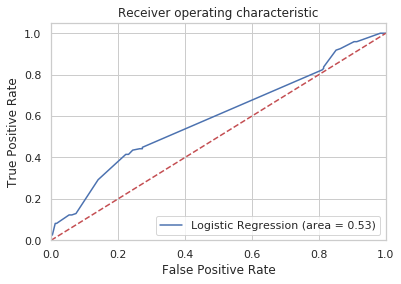

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()